In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pprint import pprint
from random import sample 

# Crop Yields Exploratory analysis

This is a exploratory analysis of a dataset found [here](https://ourworldindata.org/crop-yields). In this dataset we can find crop yields by year and country.

In [2]:
yields = pd.read_csv('crop_yield.csv')
yields.to_parquet('crop_yield.parquet')

In [3]:
yields

,country,year,abaca__manila_hemp__raw_yield,agave_fibres__raw__n_e_c__yield,almond_yield,apples_yield,apricots_yield,areca_nuts_yield,artichokes_yield,asparagus_yield,...,potato_yield_gap,rapeseed_yield_gap,rice_yield_gap,rye_yield_gap,sorghum_yield_gap,soybean_yield_gap,sugarbeet_yield_gap,sugarcane_yield_gap,sunflower_yield_gap,wheat_yield_gap
0,Afghanistan,1961,NaN,NaN,NaN,6.8018,6.6390,NaN,NaN,NaN,...,37.143303,NaN,7.8410,NaN,NaN,NaN,66.022400,NaN,0.4042,2.9780
1,Afghanistan,1962,NaN,NaN,NaN,6.8018,6.6390,NaN,NaN,NaN,...,38.143303,NaN,7.8410,NaN,NaN,NaN,61.216705,NaN,0.3078,3.0265
2,Afghanistan,1963,NaN,NaN,NaN,6.8018,6.6390,NaN,NaN,NaN,...,37.676700,NaN,7.8410,NaN,NaN,NaN,62.391903,NaN,0.3078,3.1683
3,Afghanistan,1964,NaN,NaN,NaN,7.8298,7.6863,NaN,NaN,NaN,...,37.210003,NaN,7.6327,NaN,NaN,NaN,69.152900,NaN,0.3078,3.0490
4,Afghanistan,1965,NaN,NaN,NaN,8.2258,8.0819,NaN,NaN,NaN,...,37.010002,NaN,7.6327,NaN,NaN,NaN,64.010000,NaN,0.2596,3.0277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,Zimbabwe,2018,NaN,NaN,NaN,8.9243,1.9777,NaN,13.023999,4.0152,...,21.272500,NaN,7.8175,NaN,3.5902,0.5520,NaN,30.227898,1.1889,1.9322
14573,Zimbabwe,2019,NaN,NaN,NaN,8.9199,1.9832,NaN,12.873700,4.1016,...,21.321800,NaN,7.7716,NaN,3.9052,1.7246,NaN,32.415200,1.3376,0.7351
14574,Zimbabwe,2020,NaN,NaN,NaN,8.9063,1.9938,NaN,12.456100,4.0474,...,21.930500,NaN,7.6086,NaN,3.6017,0.6053,NaN,34.450600,1.1410,0.0000
14575,Zimbabwe,2021,NaN,NaN,NaN,8.8972,1.9892,NaN,12.780200,4.0843,...,22.640999,NaN,7.3810,NaN,3.5428,0.8498,NaN,36.445700,1.2232,0.0000


As we can see the columns are numerous, so we need to select a few crops. Also, to select a few coutrys we cut out the ones that don't have data before 1850 and from those we select 5

In [38]:
crops = ['wheat', 'potato', 'rice', 'maize'] #crops selected
crops = [crop + '_yield' for crop in crops] #Appending the _yield string to find the column name

main = ['country', 'year'] # To also filter by these columns
countrys = yields[yields.year <= 1850].country.unique()# Find all countrys that have data before 1850
countrys = sample(list(countrys), 5) #select 5 countrys

[]

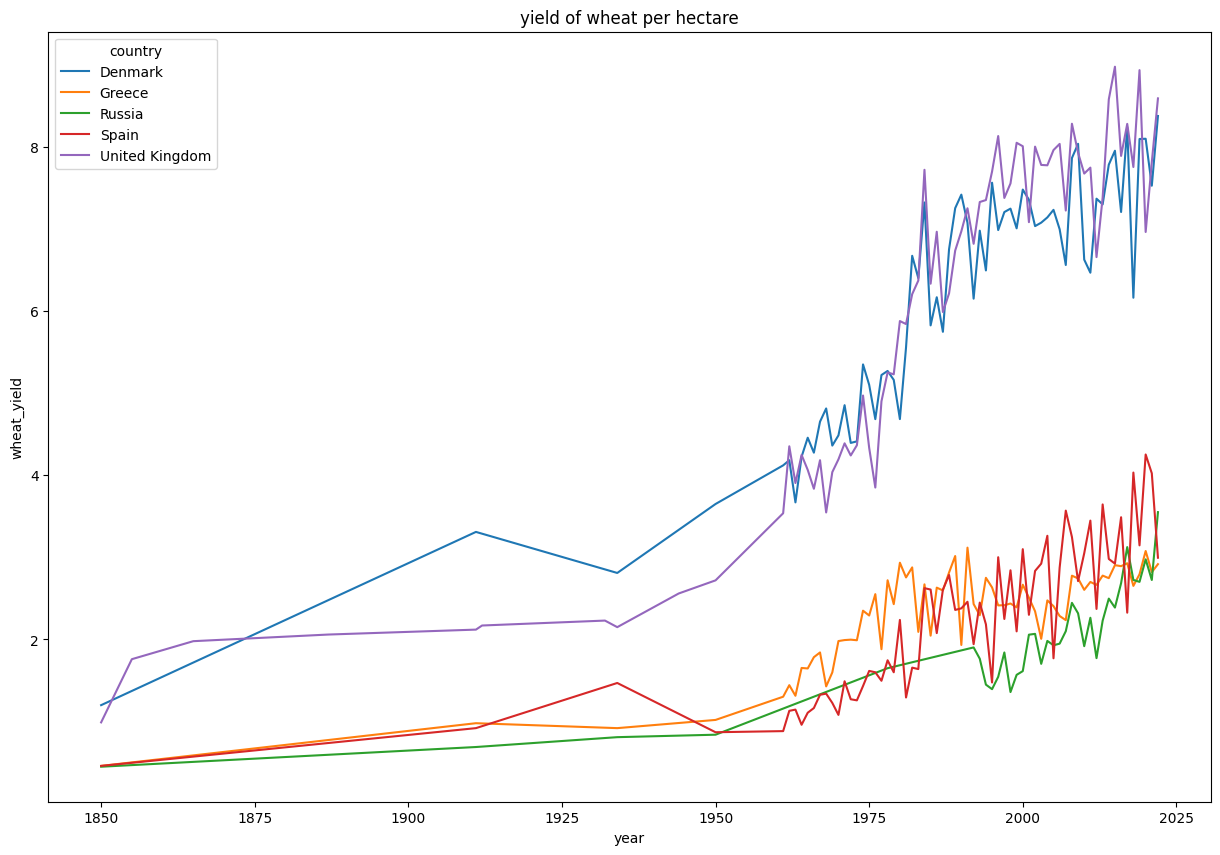

In [42]:
# ploting the selected countrys
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
_ = yields[(yields.country.isin(countrys)) * (yields.year >= 1850)][main+crops] # filtering the data we want to plot
sns.lineplot(_,x = 'year', y = crops[0], hue = 'country', ax= ax)
ax.set_title(f'yield of {crops[0].split("_")[0]} per hectare')
ax.plot()

## Attainable yeild

In this dataset we have a column with the teoretical yield that in a perfect condition a coutry would produce. Let's have a look on the best producers in the world

In [43]:
crops = ['wheat', 'potato', 'rice', 'maize']
crops = [crop + '_attainable_yield' for crop in crops]
yields_attainable = yields[yields.year == 2022][main+crops].dropna().drop(columns = ['year'])

In [56]:
for crop in crops:
    worst = yields_attainable.sort_values(crop, ascending=True).reset_index().head(5).country
    best =  yields_attainable.sort_values(crop, ascending=False).reset_index().head(5).country
    print(f'the best producing countrys of {crop.split("_")[0]} are:')
    pprint(best)
    print(f'the worst producing countrys of {crop.split("_")[0]} are:')
    pprint(worst)

the best producing countrys of wheat are:
0     France
1      Japan
2    Moldova
3     Bhutan
4    Ukraine
Name: country, dtype: object
the worst producing countrys of wheat are:
0    Kazakhstan
1      Portugal
2    Kyrgyzstan
3      Honduras
4     Australia
Name: country, dtype: object
the best producing countrys of potato are:
0             Iran
1      Afghanistan
2       Kazakhstan
3    United States
4           France
Name: country, dtype: object
the worst producing countrys of potato are:
0    Uruguay
1    Vietnam
2      India
3      Sudan
4    Burundi
Name: country, dtype: object
the best producing countrys of rice are:
0     Australia
1      Bulgaria
2       Romania
3       Ukraine
4    Kazakhstan
Name: country, dtype: object
the worst producing countrys of rice are:
0     Thailand
1        India
2      Nigeria
3        Benin
4    Venezuela
Name: country, dtype: object
the best producing countrys of maize are:
0     Azerbaijan
1        Algeria
2     Kazakhstan
3          Chile
4

## overall attainability
Now let's calculate the countrys that appears the most in the ranking of best producers and the ones that appears the most in the worst producers

In [60]:
crops_with_attainables = []
for col in yields.columns:
    try:
        if col.split('_')[-2] == 'attainable':
            crops_with_attainables.append(col)
    except:
        continue

In [65]:
for col in crops_with_attainables:
    print(len(yields[main + [col]].dropna().country.unique()))

84
65
80
89
122
79
43
126
72
99
58
93
98
64
79
71
107
